In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [46]:
data = pd.read_csv("C:\\Users\\anish\\Downloads\\train.csv")

In [47]:
data.isna().sum().tolist()

[0,
 0,
 0,
 259,
 0,
 0,
 1369,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 872,
 8,
 0,
 0,
 0,
 37,
 37,
 38,
 37,
 0,
 38,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 690,
 81,
 81,
 81,
 0,
 0,
 81,
 81,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1453,
 1179,
 1406,
 0,
 0,
 0,
 0,
 0,
 0]

In [48]:
data = pd.read_csv("C:\\Users\\anish\\Downloads\\train.csv")

# Drop columns with missing values
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'MasVnrArea', 'FireplaceQu']
data = data.drop(columns=columns_to_drop)

# Replace missing values for garage-related columns
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
data[garage_cols] = data[garage_cols].fillna('NoGarage')

# Replace missing values for basement-related columns
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
data[basement_cols] = data[basement_cols].fillna('NoBasement')

# Calculate the mean of the 'LotFrontage' column (excluding missing values)
mean_lotfrontage = data['LotFrontage'].mean()

# Replace missing values with the mean
data['LotFrontage'].fillna(mean_lotfrontage, inplace=True)

# Calculate the mode of the 'LotFrontage' column (excluding missing values)
m_Electrical = data['Electrical'].mode()

# Replace missing values with the mode
data['Electrical'].fillna(m_Electrical, inplace=True)

In [49]:
import numpy as np
from scipy.stats import zscore

# Select numerical columns, excluding 'GarageYrBlt' for the Z-score calculation
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'GarageYrBlt' from numerical columns for outlier detection
numerical_cols.remove('GarageYrBlt')

# Calculate Z-scores for the remaining numerical columns
z_scores = np.abs(zscore(data[numerical_cols]))

# Set a threshold for Z-scores 
threshold = 3

# Keep only rows --> where the Z-score is below the threshold for numerical columns
data = data[(z_scores < threshold).all(axis=1)]

# Print the number of rows before and after outlier removal
print(f"After outlier removal: {data.shape[0]}")

After outlier removal: 1028


In [50]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [51]:
# Creating New Features
data['TotalArea'] = data['GrLivArea'] + data['TotalBsmtSF']
data['HouseAge'] = data['YrSold'] - data['YearBuilt']
data['Remodel'] = (data['YearBuilt'] != data['YearRemodAdd']).astype(int)
data['TotalBathrooms'] = data['FullBath'] + (0.5 * data['HalfBath']) + data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

In [52]:
data['BsmtHalfBath'].dtype
data['KitchenAbvGr'].dtype
data['PoolArea'].dtype

dtype('int64')

In [53]:
# Select numerical columns
num = data.select_dtypes(include=['int64', 'float64'])  # Select only numerical columns
num = num.drop(columns=['BsmtHalfBath', 'KitchenAbvGr', 'PoolArea'])  # Drop unwanted columns
print(num)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
2        3          60         68.0    11250            7            5   
4        5          60         84.0    14260            8            5   
6        7          20         75.0    10084            8            5   
10      11          20         70.0    11200            5            5   
...    ...         ...          ...      ...          ...          ...   
1452  1453         180         35.0     3675            5            5   
1453  1454          20         90.0    17217            5            5   
1454  1455          20         62.0     7500            7            5   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   

      YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  ...  EnclosedPorch  \
0          2003          2003     

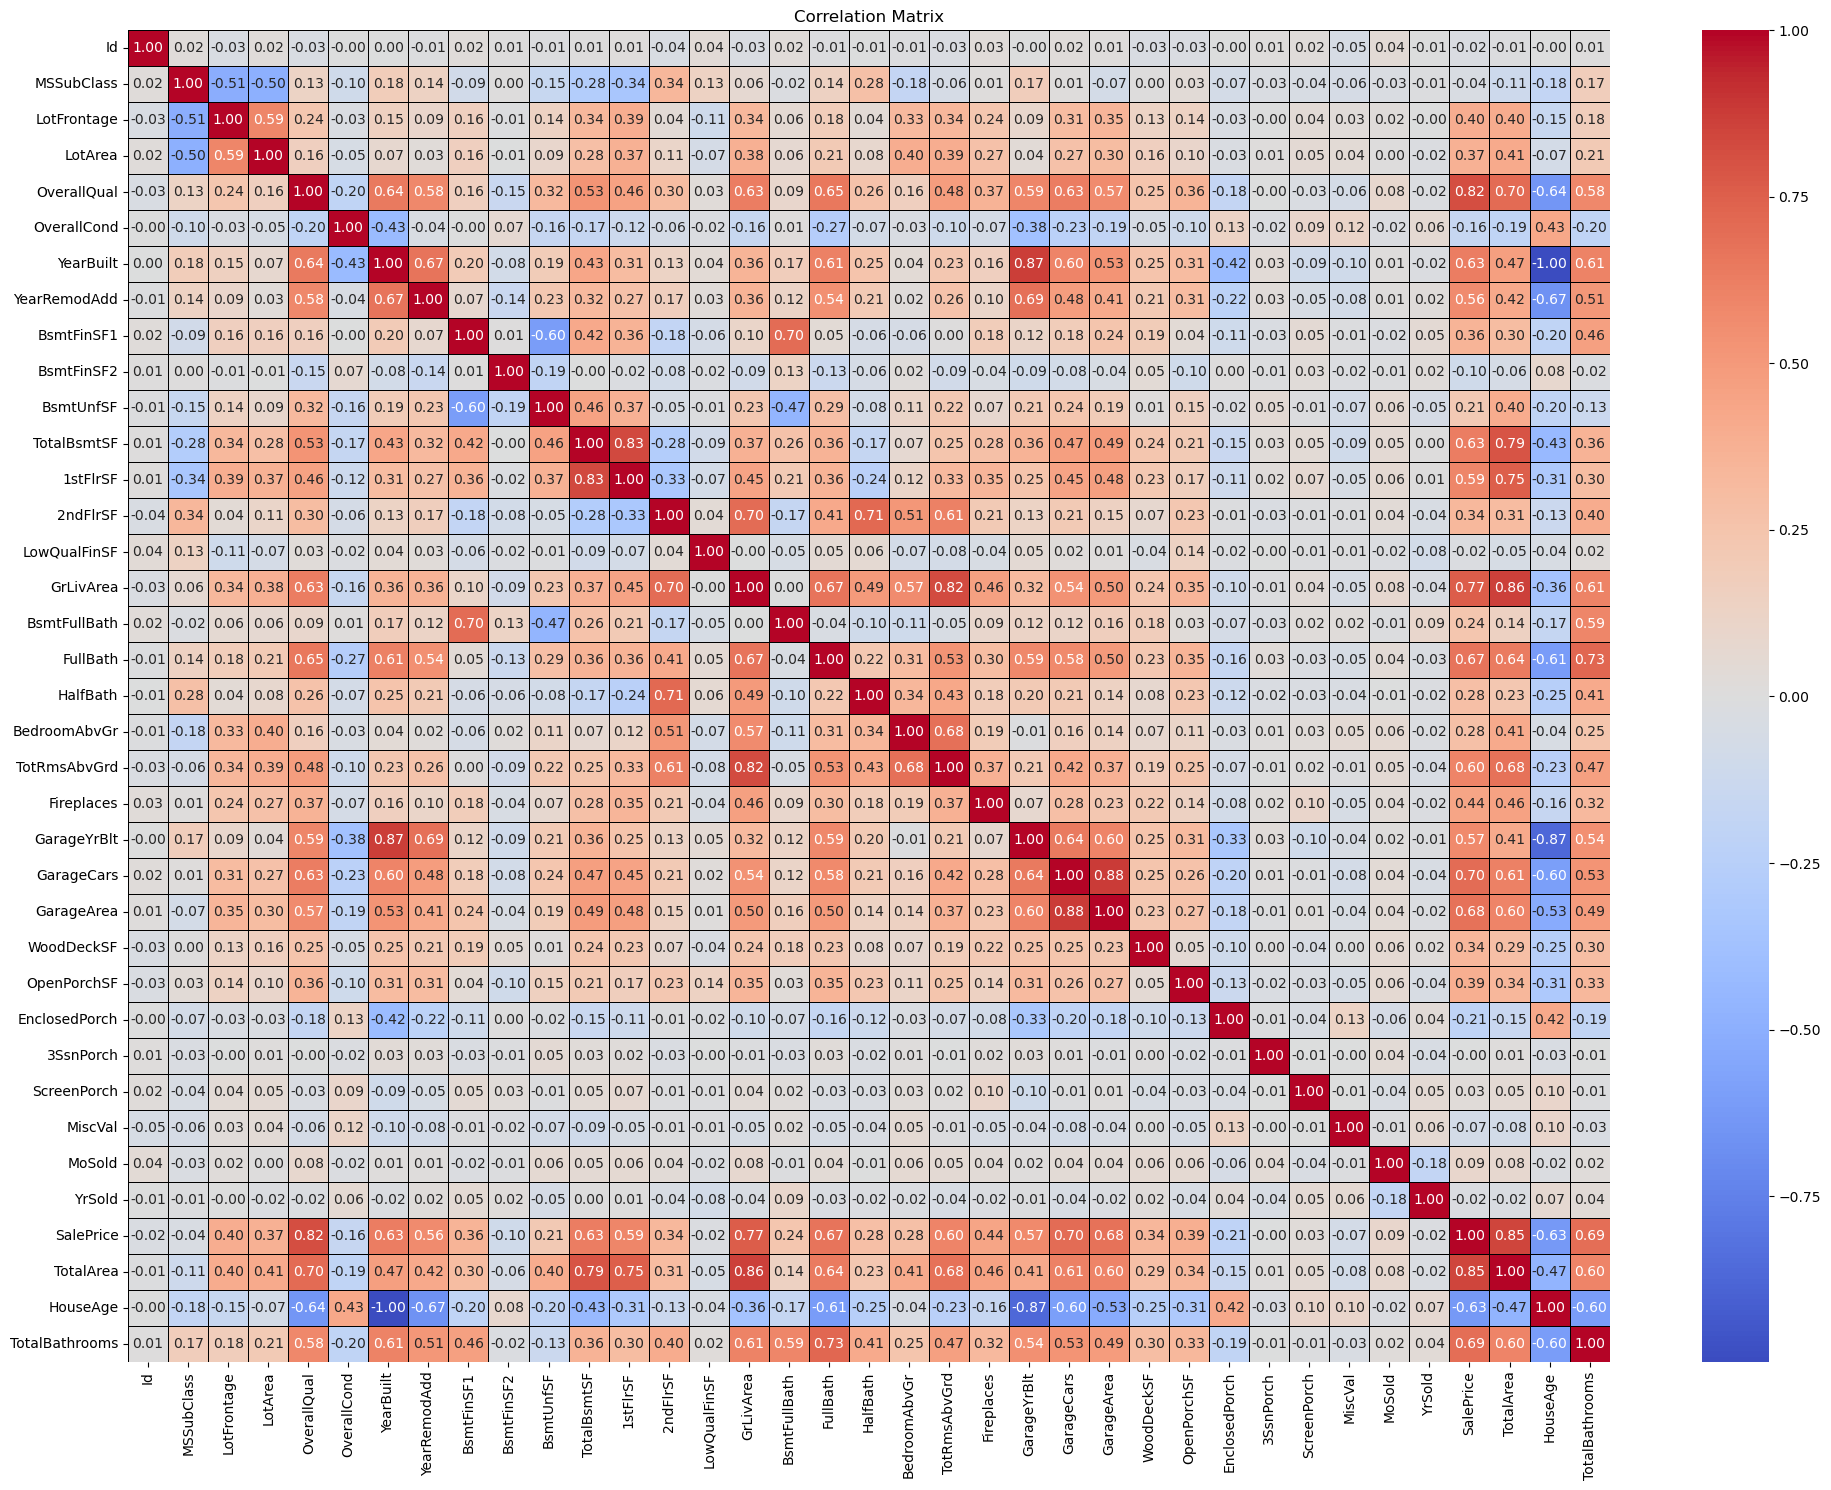

In [30]:
# Compute correlation matrix
corr = num.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [55]:
from sklearn.preprocessing import StandardScaler

# StandardScaler
scaler = StandardScaler()

# Select numeric columns for scaling 
numeric_cols = data.select_dtypes(include=['number']).columns

# Apply StandardScaler
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verify scaling
print(data.head())

          Id  MSSubClass MSZoning  LotFrontage   LotArea Street LotShape  \
0  -1.735247    0.144020       RL    -0.142721 -0.194159   Pave      Reg   
2  -1.730520    0.144020       RL     0.020674  0.576120   Pave      IR1   
4  -1.725793    0.144020       RL     0.892110  1.404170   Pave      IR1   
6  -1.721066   -0.846299       RL     0.401927  0.255354   Pave      Reg   
10 -1.711611   -0.846299       RL     0.129603  0.562365   Pave      Reg   

   LandContour Utilities LotConfig  ...   MiscVal    MoSold    YrSold  \
0          Lvl    AllPub    Inside  ... -0.144857 -1.592606  0.138594   
2          Lvl    AllPub    Inside  ... -0.144857  1.026314  0.138594   
4          Lvl    AllPub       FR2  ... -0.144857  2.148708  0.138594   
6          Lvl    AllPub    Inside  ... -0.144857  0.652182 -0.607345   
10         Lvl    AllPub    Inside  ... -0.144857 -1.592606  0.138594   

   SaleType SaleCondition SalePrice  TotalArea  HouseAge   Remodel  \
0        WD        Normal  0.53415

In [56]:
# List of nominal variables to one-hot encode
nominal_vars = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 
    'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 
    'SaleCondition'
]

# List of ordinal variables to numeric encode
ordinal_vars = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'HeatingQC', 'KitchenQual', 'Functional', 'GarageQual', 'GarageCond'
]

# Replace missing values for garage-related columns
garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
data[garage_cols] = data[garage_cols].fillna('NoGarage')

# Replace missing values for basement-related columns
basement_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
data[basement_cols] = data[basement_cols].fillna('NoBasement')

# Ordinal Mapping Dictionary
ordinal_mapping = {
    'OverallQual': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},
    'OverallCond': {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBasement': 0},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBasement': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoBasement': 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 5, 'Min1': 4, 'Min2': 3, 'Mod': 2, 'Maj1': 1, 'Maj2': 0, 'Sev': -1, 'Sal': -2},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}
}

# Apply the ordinal mappings to the original columns before encoding
for var in ordinal_vars:
    if var in data.columns:
        data[var] = data[var].map(ordinal_mapping.get(var, {}))

# Apply one-hot encoding for nominal variables
data = pd.get_dummies(data, columns=nominal_vars, drop_first=True)

In [57]:
# Number of nominal variables
num_nominal = len(nominal_vars)

# Number of ordinal variables
num_ordinal = len(ordinal_vars)

# Print the count
print(f"Number of nominal variables: {num_nominal}")
print(f"Number of ordinal variables: {num_ordinal}")

Number of nominal variables: 37
Number of ordinal variables: 9


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 0 to 1456
Columns: 220 entries, Id to SaleCondition_Partial
dtypes: bool(179), float64(41)
memory usage: 517.0 KB


In [59]:
missing_values = data.isna().sum()
missing_columns = missing_values[missing_values > 0]  # Select only columns with missing values

print(missing_columns)

GarageYrBlt    46
dtype: int64


In [60]:
data = data.drop(columns=['GarageYrBlt'])

In [ ]:
# Target and features
X = data.drop(columns=["SalePrice"])  # Take all features except SalePrice
y = data["SalePrice"]

# Handle categorical variables by one-hot encoding (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
# Ridge Regression
ridge = Ridge(alpha=100, max_iter=1000, random_state= 43)  # Adjust alpha for regularization strength
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_preds)
print(f"Ridge Regression MSE: {ridge_mse:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=1000, random_state= 43)  # Adjust alpha for feature selection strength
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_preds)
print(f"Lasso Regression MSE: {lasso_mse:.4f}")

Ridge Regression MSE: 0.0879
Lasso Regression MSE: 0.1505


In [62]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
import warnings
from tabulate import tabulate

# Suppress warnings
warnings.filterwarnings('ignore')

# Target and features
X = data.drop(columns=["SalePrice"])  # Take all features except SalePrice
y = data["SalePrice"]

# Handle categorical variables by one-hot encoding 
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better performance 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=100, max_iter=1000, random_state= 43)
ridge.fit(X_train_scaled, y_train)
ridge_preds = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_preds)
print(f"Ridge Regression MSE: {ridge_mse:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1, max_iter=1000, random_state= 43)
lasso.fit(X_train_scaled, y_train)
lasso_preds = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_preds)
print(f"Lasso Regression MSE: {lasso_mse:.4f}")

# R² for both models
ridge_r2 = r2_score(y_test, ridge_preds)
lasso_r2 = r2_score(y_test, lasso_preds)
print(f"Ridge R²: {ridge_r2:.4f}")
print(f"Lasso R²: {lasso_r2:.4f}")

Ridge Regression MSE: 0.0879
Lasso Regression MSE: 0.1505
Ridge R²: 0.9154
Lasso R²: 0.8552


In [63]:
# Function to calculate regression metrics
def regression_metrics(y_true, y_pred, X):
    mse = mean_squared_error(y_true, y_pred)
    # Root Mean Squared Error
    rmse = np.sqrt(mse)  
    # Mean Absolute Error
    mae = mean_absolute_error(y_true, y_pred)  
    # R² Score
    r2 = r2_score(y_true, y_pred)  
    explained_var = explained_variance_score(y_true, y_pred)  
    n, p = X.shape  # Number of samples (n) and predictors (p)

    return {"RMSE": rmse, "MAE": mae}

# Ridge Regression Metrics
ridge_metrics = regression_metrics(y_test, ridge_preds, X_test)

# Lasso Regression Metrics
lasso_metrics = regression_metrics(y_test, lasso_preds, X_test)

# Create a DataFrame to display the results 
metrics_df = pd.DataFrame([ridge_metrics, lasso_metrics], index=["Ridge", "Lasso"])

# Add MSE and R² values to DataFrame
metrics_df["MSE"] = [ridge_mse, lasso_mse]
metrics_df["R²"] = [ridge_r2, lasso_r2]

# Reorder columns to the specified order
metrics_df = metrics_df[["MSE", "RMSE", "MAE", "R²"]]

# Round values to 4 decimal places
metrics_df = metrics_df.applymap(lambda x: f"{x:.4f}")

# Print the table with lines using tabulate
print(metrics_df)

          MSE    RMSE     MAE      R²
Ridge  0.0879  0.2964  0.2024  0.9154
Lasso  0.1505  0.3879  0.2759  0.8552


In [65]:
# Display important features from Lasso
lasso_coef = pd.Series(lasso.coef_, index=X.columns)
print("Lasso selected features: \n",lasso_coef[lasso_coef != 0])

Lasso selected features: 
 LotArea             0.006018
OverallQual         0.219580
YearRemodAdd        0.020271
GrLivArea           0.085451
GarageCars          0.037253
GarageArea          0.078726
TotalArea           0.314569
HouseAge           -0.026418
TotalBathrooms      0.090354
ExterQual_3        -0.031297
BsmtQual_5          0.068490
BsmtFinType1_GLQ    0.010984
KitchenQual_3      -0.003296
KitchenQual_5       0.023717
dtype: float64


In [66]:
from sklearn.model_selection import GridSearchCV
ridge_cv = GridSearchCV(Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print(f"Best Ridge Lasso: {ridge_cv.best_params_['alpha']}")

Best Ridge Lasso: 0.01


In [67]:
from sklearn.model_selection import GridSearchCV
ridge_cv = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5)
ridge_cv.fit(X_train_scaled, y_train)
print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}")

Best Ridge alpha: 100


In [70]:
data.shape

(1028, 219)

In [72]:
#OLS Regression
import statsmodels.api as sm

# Add a constant term for the intercept
X_train_ols = sm.add_constant(X_train_scaled)
X_test_ols = sm.add_constant(X_test_scaled)

# Fit OLS model
ols_model = sm.OLS(y_train, X_train_ols).fit()

# Print summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     66.42
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:19:50   Log-Likelihood:                 105.99
No. Observations:                 822   AIC:                             182.0
Df Residuals:                     625   BIC:                             1110.
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0226      0.009     -2.662      0.0

strong multicollinearity problems or that the design matrix is singular.
